In [7]:
# Add Matplotlib incline magic command
%matplotlib inline 

# Dependencies and Set up.
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Files to load.
city_data_to_load= "Resources/city_data.csv"
ride_data_to_load= "Resources/ride_data.csv"

In [9]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [45]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12


In [11]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [12]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [14]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
# Get the number of data points from the Urban Cities.
sum(city_data_df["type"]=="Urban")

66

In [16]:
# Get the number of data points from the Suburban Cities.

sum(city_data_df["type"]=="Suburban")

36

In [17]:
# Get the number of data points from the Rural Cities.

sum(city_data_df["type"]=="Rural")

18

In [18]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [19]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [20]:
# Get the data types of each column.
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [47]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


In [22]:
# Create the Urban city DataFrame.
urban_cities_df= pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


In [23]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df= pyber_data_df[pyber_data_df["type"]== "Suburban"]
rural_cities_df= pyber_data_df[pyber_data_df["type"]== "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2018 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2018 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2018 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2018 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2018 8:57,51.80,4.018030e+12,2,Rural


In [54]:
# Get the number of rides for urban cities.
urban_ride_count= urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [55]:
# Create the suburban and rural ride count.
suburban_ride_count= suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count= rural_cities_df.groupby(["city"]).count()["ride_id"]


In [62]:
# Get the average fdare for each city in the urban cities.
urban_avg_fare= urban_cities_df.groupby(["driver_count"]).mean()["fare"]
urban_avg_fare.mean()

24.583096899703865

In [27]:
# Get the average fare for each city in the suburban and rural cities.

suburban_avg_fare= suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare= rural_cities_df.groupby(["city"]).mean()["fare"]


In [65]:
# Get the average number of drivers for each urban city.
urban_driver_count= urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.mean()


36.43939393939394

In [29]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count= suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count= rural_cities_df.groupby(["city"]).mean()["driver_count"]


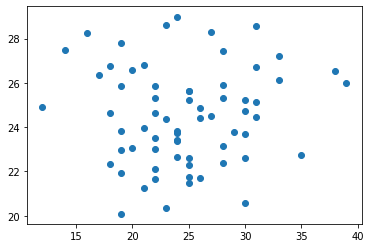

In [30]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

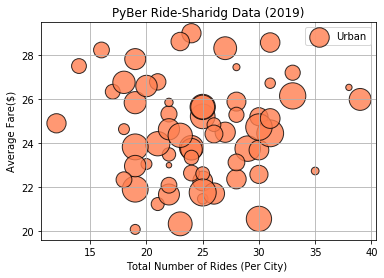

In [31]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, # increase the size factor by 10
            c="coral", # Add the color coral
            edgecolor="black", # add color to the edge
            linewidths=1, # add the line width
            alpha=0.8,
            label="Urban") # add the name of the label
# Add the title
plt.title("PyBer Ride-Sharidg Data (2019)")
# Add the y Label name
plt.ylabel("Average Fare($)")
# Add the X Label name
plt.xlabel("Total Number of Rides (Per City) ")
# Add the Grid to the Chart
plt.grid(True)
# Add the legend.
plt.legend()


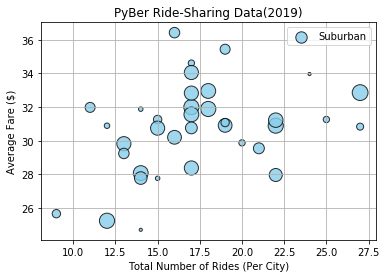

In [32]:
# Build the scatter plots for suburban cities.
# Matlab method.
plt.scatter(suburban_ride_count, # Creates the scatter plot.
           suburban_avg_fare,
            s=10*suburban_driver_count, # Increases the size factor to 10
            c="skyblue", # Fills in the color of the bubbles to sky blue
            edgecolor="black", # Makes the edge colors of the bubbles to be black.
            linewidth=1, # Inputs the line width to 1
            alpha=0.8,
            label="Suburban",) # Adds the Label name
# Adds the name of the title.
plt.title("PyBer Ride-Sharing Data(2019)")
# Adds the name for the y Label.
plt.ylabel("Average Fare ($)")
# Adds the name for the x Label.
plt.xlabel("Total Number of Rides (Per City)")
# Adds the Grid
plt.grid(True)
# Adds the legend.
plt.legend()      

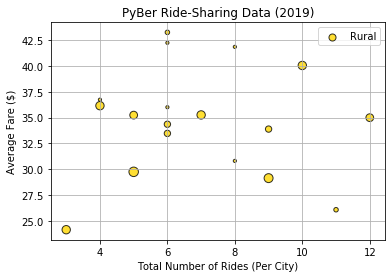

In [33]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, # Creates the scatter plot
      rural_avg_fare,
      s=10*rural_driver_count, # Increases the size factor to 10
      c="gold", # Sets the color of the bubbles to gold
      edgecolor="black", # Creates an edge on the bubbles and sets their color to black
      linewidths=1, # Sets the linewidths equal to 1
      alpha=0.8,
      label="Rural") # Sets the label description to Rural
# Creates the title
plt.title("PyBer Ride-Sharing Data (2019)")
# Adds the title description for the y label
plt.ylabel("Average Fare ($)")
# Adds the title description for the x label
plt.xlabel("Total Number of Rides (Per City)")
# Adds a Grid to the bubble chart
plt.grid(True)
# Add the legend.
plt.legend()

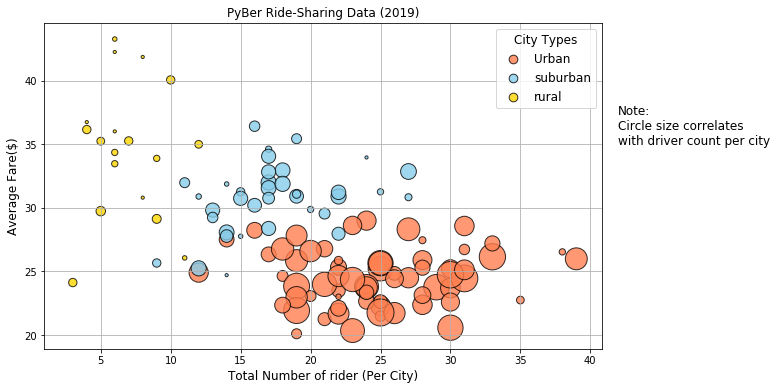

In [34]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, # Creates the scatter plot
           urban_avg_fare,
           s=10*urban_driver_count, # Increases the size factor to 1
           c="coral", # Changes the color of the bubble to coral
           edgecolor="black", # adds a black edge to the bubble
           linewidths=1, # sets the linewidth equal to 1
           alpha=0.8,
           label="Urban") # Sets the label equal to "urban"

# Creates the scatter plot for suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, # Increases the size factor to 1
           c="skyblue", # Changes the color of the bubble to skyblue
           edgecolor="black", # adds a black edge to the bubble
           linewidths=1, # sets the linewidth equal to 1
           alpha=0.8,
           label="suburban") # Sets the label equal to "suburban"

# Creates the scatter plot for rural
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, # Increases the size factor to 1
           c="gold", # Changes the color of the bubble to gold
           edgecolor="black", # adds a black edge to the bubble
           linewidths=1, # sets the linewidth equal to 1
           alpha=0.8,
           label="rural") # Sets the label equal to "rural"

# Incorporating the other Graph properties.

# Creating the title for the Graph and setting the Fontsize to 12
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=12)

# Creating the y-label Description and adjusting the Fontsize to 12
plt.ylabel("Average Fare($)", fontsize=12)
# Creating the x-label Description and adjusting the Fontsize to 12
plt.xlabel("Total Number of rider (Per City)", fontsize=12)

# Adding a Grid to the Graph.
plt.grid(True)

# Adding the Legend to the Graph
lgnd= plt.legend(fontsize="12", # Sets the fontsize
                mode="Expanded", # Expands the legend horizontally
                scatterpoints=1, # Sets the number of scatter points in the legend to be equal to 1
                loc="best", # Location set to "best" based on the plotting of the data points.
                title="City Types") # # Determining the title

# Incorporate a text label about circle size.
plt.text(42,35, "Note:\nCircle size correlates\nwith driver count per city",
        fontsize="12")

# Saves the figure into 
#C:\Users\Irvin M Godinez\Desktop\PyBer_Analysis\analysis .
plt.savefig("analysis/fig1.png")

# Determining the size for each legend individually.
lgnd.legendHandles[0]._sizes= [75] 
lgnd.legendHandles[1]._sizes= [75]
lgnd.legendHandles[2]._sizes= [75]

# Determining the size for the title of the legend
# Icreases size of the legend title to 12
lgnd.get_title().set_fontsize(12) 

# Show the plot
plt.show()
           


In [35]:
# Get summary statistics for Urban Cities.the output will show the count, 
# mean, standard deviation, minimum value, 25%, 50%, 
# and 75% percentiles, and maximum value from a DataFrame column that has numeric values.
urban_cities_df.describe()



,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [36]:
# Get summary statistics for Suburban Cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [37]:
# Get summary statistics for Rural Cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [38]:
# Get summary statistics for Urban Cities.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [39]:
# Get summary statistics for Suburban Cities.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [40]:
# Get summary statistics for Rural Cities.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [41]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [42]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [43]:
#Pandas method for finding the Mode.
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode()), round(suburban_ride_count.mode()), round(rural_ride_count.mode())

(0    22
 1    25
 dtype: int64, 0    17
 dtype: int64, 0    6
 dtype: int64)

In [44]:
# Calculate the measures of central tendency for the ride count for the urban cities.
# Gets the mean for Urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

# Gets the Median for Urban cities.
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

# Gets the Mode for Urban cities.
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

NameError: name 'np' is not defined

In [ ]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
# Gets the mean for Suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

# Gets the median for Suburban cities.
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

# Gets the mode for Suburban cities.
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

In [ ]:
# Calculate the measures of central tendency for the ride count for the rural cities.
# Gets the mean for Rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

# Gets the median for Rural cities.
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

# Gets the mode for Rural cities.
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

In [ ]:
# Get the fares for the urban cities.
urban_fares= urban_cities_df["fare"]
urban_fares.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the urban cities.
#Getting the mean of Urban Cities.
mean_urban_fares= np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

#Getting the median of Urban Cities.
median_urban_fares= np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

#Getting the mode of Urban Cities.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_urban_fares= sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

In [ ]:
# Get the fares for the urban cities.
rural_fares= rural_cities_df["fare"]
rural_fares.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the mean of Rural Cities.
mean_rural_fares= np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

#Getting the median of Rural Cities.
median_rural_fares= np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

#Getting the mode of Rural Cities.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_rural_fares= sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

In [ ]:
# Get the fares for the suburban cities.
suburban_fares= suburban_cities_df["fare"]
suburban_fares.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the mean of Suburban Cities.
mean_suburban_fares= np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

#Getting the median of Suburban Cities.
median_suburban_fares= np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

#Getting the mode of Suburban Cities.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_suburban_fares= sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

In [ ]:
# Get the driver count data from the Urban cities.
urban_drivers= urban_cities_df['driver_count']
urban_drivers.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the Mean of Urban Driver Count.
mean_urban_drivers= np.mean(urban_drivers)
print(f"The Mean for Urban Driver Count is ${mean_urban_drivers:.2f}.")

#Getting the Median of Urban Driver Count.
median_urban_drivers= np.median(urban_drivers)
print(f"The Median for Urban Driver Count is ${median_urban_drivers:.2f}.")

#Getting the mode of Urban Driver Count.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_urban_drivers= sts.mode(urban_drivers)
print(f"The mode for Urban Driver Count is {mode_urban_drivers}.")

In [ ]:
# Get the driver count data from the Suburban cities.
suburban_drivers= suburban_cities_df['driver_count']
suburban_drivers.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the Mean of Suburban Driver Count.
mean_suburban_drivers= np.mean(suburban_drivers)
print(f"The mean for Suburban driver count is ${mean_suburban_drivers:.2f}.")

#Getting the Median of Suburban Driver Count.
median_suburban_drivers= np.median(suburban_drivers)
print(f"The median for suburban driver count is ${median_suburban_drivers:.2f}.")

#Getting the Median of Urban Driver Count.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_suburban_drivers= sts.mode(suburban_drivers)
print(f"The mode for Suburban driver count is {mode_suburban_drivers}.")

In [ ]:
# Get the driver count data from the Suburban cities.
rural_drivers= rural_cities_df['driver_count']
rural_drivers.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the rural cities.
#Getting the Mean of Rural Driver Count.
mean_rural_drivers= np.mean(rural_drivers)
print(f"The mean for Rural driver count is ${mean_rural_drivers:.2f}.")

#Getting the Median of Rural Driver Count.
median_rural_drivers= np.median(rural_drivers)
print(f"The median for Rural driver count is ${median_rural_drivers:.2f}.")

#Getting the Median of Rural Driver Count.
# np doesn't calculate mode most use sts.
# Also inside curly brackets input only name
mode_rural_drivers= sts.mode(rural_drivers)
print(f"The mode for Rural driver count is {mode_rural_drivers}.")

In [ ]:
# Create a box-and-whisker plot for the Urban cities ride count.
x_labels=["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')

# Setting the tick for the Y label
ax.set_yticks(np.arange(10,41, step=2.0))

# Adds Grid
ax.grid()
plt.show()

In [ ]:
suburban_ride_count.describe()

In [ ]:
# Create a box-and-whisker plot for the Urban cities ride count.
x_labels=["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')

# Setting the tick for the Y label
ax.set_yticks(np.arange(10,41, step=2.0))

# Adds Grid
ax.grid()
plt.show()

In [ ]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=["Urban","Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax= plt.subplots(figsize=(10,6))

# Adds the title for the Whiskey Plot
ax.set_title('Ride Count Data(2019)',fontsize=20)

# Adds the y label Description and it's font size.
ax.set_ylabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))

# Adds the Grid
ax.grid
#Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show

In [ ]:
# Get the city that matches 39
urban_city_outlier= urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier}has the highest rider count.")

In [ ]:
# Create a box-and-whisker plot for the urban fare dataD.
x_labels=["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title
ax.set_title('Ride Fare Data (2019)')
# Adds the y label description.
ax.set_ylabel('Fare($USD)')
# Sets the tick parameters on the y-axis. 
ax.set_yticks(np.arange(0,51, step=5.0))
# Adds a Grid to the Whisker Plot
ax.grid()
# Prints the Whisker Plot.
plt.show()
# Prints the Summary Statistics for Urban Fares.
print("Summary Statistics")
urban_fares.describe()


In [ ]:
# Create a box-and-whisker plot for the Suburban fare data.
x_labels=["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_fares , labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
# Adds the y label description.
ax.set_ylabel('Fare($USD)')
# Sets the tick parameters on the y-axis.
ax.set_yticks(np.arange(0,51, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()
# Prints the Summary Statistics for Suburban Fares.
print("Summary Statistics")
suburban_fares.describe()


In [ ]:
# Create a box-and-whisker plot for the Suburban fare data.
x_labels=["Rural"]
fig, ax= plt.subplots()
ax.boxplot(rural_fares , labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
# Adds the y label description.
ax.set_ylabel('Fare($USD)')
# Sets the tick parameters on the y-axis.
ax.set_yticks(np.arange(0,56, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()
# Prints the Summary Statistics for Suburban Fares.
print("Summary Statistics")
rural_fares.describe()


In [ ]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=["Urban","Suburban", "Rural"]
ride_fare_data=[urban_fares, suburban_fares, rural_fares]
fig, ax= plt.subplots(figsize=(10,6))

# Adds the title for the Whiskey Plot
ax.set_title('Ride Fare Data(2019)',fontsize=20)

# Adds the y label Description and it's font size.
ax.set_ylabel("Fare ($USD)", fontsize=14)
# Sets the x label description to City Types.
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,56, step=5.0))

# Adds the Grid
ax.grid()
#Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show

In [ ]:
# Create the box-and_whisker plot for the Urban Driver Count Data.
x_labels=["Urban"]
fig, ax= plt.subplots()
# Creates the Whisker Box Plot for urban_drivers
ax.boxplot(urban_drivers, labels=x_labels)

# Adds the title.
ax.set_title('Driver Count Data (2019)')
# Sets the y-label description.
ax.set_ylabel('Number of Drivers')
# Sets the y-tick parameters
ax.set_yticks(np.arange(0,90, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()

# Prints the Summary Statistics for Urban Drivers.
print("Summary Statistics")
urban_drivers.describe()

In [ ]:
# Create the box-and_whisker plot for the Suburban Driver Count Data.
x_labels=["Suburban"]
fig, ax= plt.subplots()
# Creates the Whisker Box Plot for urban_drivers
ax.boxplot(suburban_drivers , labels=x_labels)

# Adds the title.
ax.set_title('Driver Count Data (2019)')
# Sets the y-label description.
ax.set_ylabel('Number of Drivers')
# Sets the y-tick parameters
ax.set_yticks(np.arange(0,90, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()

# Prints the Summary Statistics for Urban Drivers.
print("Summary Statistics")
suburban_drivers.describe()

In [ ]:
# Create the box-and_whisker plot for the Suburban Driver Count Data.
x_labels=["Rural"]
fig, ax= plt.subplots()
# Creates the Whisker Box Plot for urban_drivers
ax.boxplot(rural_drivers , labels=x_labels)

# Adds the title.
ax.set_title('Driver Count Data (2019)')
# Sets the y-label description.
ax.set_ylabel('Number of Drivers')
# Sets the y-tick parameters
ax.set_yticks(np.arange(0,90, step=5.0))
# Adds a Grid to the Whisker Plot.
ax.grid()
plt.show()

# Prints the Summary Statistics for Urban Drivers.
print("Summary Statistics")
rural_drivers .describe()

In [ ]:
# Add all ride fares data on the box-and-whisker plots to the same graph.
x_labels=["Urban","Suburban", "Rural"]
ride_fare_data=[urban_drivers, suburban_drivers , rural_drivers]
fig, ax= plt.subplots(figsize=(10,6))

# Adds the title for the Whiskey Plot
ax.set_title('Ride Fare Data(2019)',fontsize=20)

# Adds the y label Description and it's font size.
ax.set_ylabel("Number of Drivers", fontsize=14)
# Sets the x label description to City Types.
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,76, step=5.0))

# Adds the Grid
ax.grid()
#Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show

In [ ]:
# Get the sum of the fares for each City Type.
sum_fares_by_type= pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

In [ ]:
# Get the sum of all the Fares.
total_fares= pyber_data_df["fare"].sum()
total_fares

In [ ]:
# Calculate the percentage of fare for each City Type.
type_percents= 100* sum_fares_by_type / total_fares
type_percents

In [ ]:
# Doing the same Calculations as above all in one line.
type_percents= 100* pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

In [ ]:
# Import mpl to change the plot configuration using rcParams.
# In order to use the rcParams function.
import matplotlib as mpl

# Build the Pie Chart.
plt.subplots(figsize=(10,6))

# Build the percentage of fares by City Type Pie Chart.
plt.pie(type_percents,
        labels=["Rural","Suburban","Urban"], # Setting the labels
        colors=["gold", "lightskyblue", "lightcoral"], # Setting the color choices.
        explode=[0,0,0.1], # Setting the Explotion on the largest column.
        autopct='%.1f%%',
        shadow=True, # Adding the shadow to the Chart.
        startangle=150)

# Adding the Title
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size']= 14

# Save the Figure.
plt.savefig("analysis/Fig5.png")

# Show the Figure
plt.show()

In [ ]:
# Calculate the percentage of rides for each City Type.
ride_percents= 100* pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

In [ ]:
# Build the Pie Chart.
plt.subplots(figsize=(10,6))

# Build the percentage of fares by City Type Pie Chart.
plt.pie(ride_percents,
        labels=["Rural","Suburban","Urban"], # Setting the labels
        colors=["gold", "lightskyblue", "lightcoral"], # Setting the color choices.
        explode=[0,0,0.1], # Setting the Explotion on the largest column.
        autopct='%.1f%%',
        shadow=True, # Adding the shadow to the Chart.
        startangle=150)

# Adding the Title
plt.title("% of Total Rides by City Type")

# Setting the Font size to  14
mpl.rcParams['font.size']= 14

# Save the Figure.
plt.savefig("analysis/Fig6.png")

# Show the Figure
plt.show()

In [ ]:
# Calculate the percentage of drivers for each City Type.
driver_percents= 100* pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
driver_percents

In [ ]:
# Build the Pie Chart.
plt.subplots(figsize=(10,6))

# Build the percentage of fares by City Type Pie Chart.
plt.pie(driver_percents,
        labels=["Rural","Suburban","Urban"], # Setting the labels
        colors=["gold", "lightskyblue", "lightcoral"], # Setting the color choices.
        explode=[0,0,0.1], # Setting the Explotion on the largest column.
        autopct='%.1f%%',
        shadow=True, # Adding the shadow to the Chart.
        startangle=165)

# Adding the Title
plt.title("% of Total Rides by City Type")

# Setting the Font size to  14
mpl.rcParams['font.size']= 14

# Save the Figure.
plt.savefig("analysis/Fig7.png")

# Show the Figure
plt.show()

In [ ]:
PyBer

In [67]:
# Module 5 Challenge
Urban=(urban_cities_df.count()["fare"],
      urban_cities_df.sum()["driver_count"],
       urban_cities_df.mean()["fare"],
       urban_driver_count.sum())
Urban

(1625, 59602, 24.52577230769236, 2405)

In [80]:
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2018 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2018 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2018 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2018 19:22,44.94,4.256850e+12,4,Rural


In [89]:
# Total Rides
Total_Rides= pyber_data_df.groupby(["type"]).count()["ride_id"]


In [90]:
# Total Fares
Total_Fares=pyber_data_df.groupby(["type"]).sum()["fare"]


In [91]:
# Total Drivers
Total_Drivers= city_data_df.groupby(["type"]).sum()["driver_count"]


In [95]:
# Avareage Fare
Average_Fare=Total_Fares/Total_Rides
Average_Fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [87]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/2018 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/2018 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/2018 21:03,11.11,2.781340e+12
2373,West Heather,5/7/2018 19:22,44.94,4.256850e+12


In [96]:
# Average Fare Per Driver
average_fare_per_driver =Total_Fares/Total_Drivers
average_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [101]:
# Creating the Pandas Data Frame
Pyber_df=pd.DataFrame({
"Total Rides": Total_Rides,
"Total Drivers": Total_Drivers,
"Total Fares": Total_Fares,
"Total Drivers": Total_Drivers,
"Average Fare per Ride": Average_Fare,
"Average Fare per Driver": average_fare_per_driver
    
        
})
Pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [102]:
# Deleting an Index name(type)
del Pyber_df.index.name
Pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [124]:
Pyber_df.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object')

In [105]:
# Formatting these columns by putting a dollar sign on them .
Pyber_df["Total Fares"]=Pyber_df["Total Fares"].map("${:,.2f}".format)
Pyber_df["Average Fare per Ride"]=Pyber_df["Average Fare per Ride"].map("${:,.2f}".format)
Pyber_df["Average Fare per Driver"]=Pyber_df["Average Fare per Driver"].map("${:,.2f}".format)
Pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [121]:
# Renaming the Columns in pyber_data_df
pyber_data_df= pyber_data_df.rename(columns={
'city': 'City',
'date':'Date',
'fare':'Fare',
'ride_id': 'Ride Id',
'driver_count': 'No. Drivers',
'type':'City Type'})
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2018 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2018 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2018 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2018 19:22,44.94,4.256850e+12,4,Rural


In [122]:
# Setting Date as an Index
pyber_data_df.set_index('Date', inplace=True)
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2018 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
3/4/2018 18:24,South Michelleport,30.24,2.343910e+12,72,Urban
2/24/2018 4:29,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2/10/2018 23:22,Rodneyfort,23.44,5.149250e+12,34,Urban
3/6/2018 4:28,South Jack,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...
4/29/2018 17:04,Michaelberg,13.38,8.550370e+12,6,Rural
1/30/2018 0:05,Lake Latoyabury,20.76,9.018730e+12,2,Rural
2/10/2018 21:03,North Jaime,11.11,2.781340e+12,1,Rural


In [126]:
# Create a new DataFrame for fares and include only the Date,
# City Type, and Fare columns using the copy() method on
# the merged DataFrame.
pyber_fares= pyber_data_df[["City Type","Fare"]].copy()
pyber_fares

,City Type,Fare
Date,,
1/14/2018 10:14,Urban,13.83
3/4/2018 18:24,Urban,30.24
2/24/2018 4:29,Urban,33.44
2/10/2018 23:22,Urban,23.44
3/6/2018 4:28,Urban,34.58
...,...,...
4/29/2018 17:04,Rural,13.38
1/30/2018 0:05,Rural,20.76
2/10/2018 21:03,Rural,11.11


In [127]:
pyber_fares.index

Index(['1/14/2018 10:14', '3/4/2018 18:24', '2/24/2018 4:29',
       '2/10/2018 23:22', '3/6/2018 4:28', '3/11/2018 12:26',
       '2/27/2018 11:17', '4/26/2018 0:43', '1/8/2018 3:28', '3/9/2018 6:26',
       ...
       '4/19/2018 4:32', '3/18/2018 10:38', '1/27/2018 18:43',
       '4/29/2018 1:58', '1/30/2018 10:55', '4/29/2018 17:04',
       '1/30/2018 0:05', '2/10/2018 21:03', '5/7/2018 19:22',
       '4/25/2018 10:20'],
      dtype='object', name='Date', length=2375)

In [128]:
# Convert index to DateTime
pyber_fares.index= pd.to_datetime(pyber_fares.index)
pyber_fares.index

DatetimeIndex(['2018-01-14 10:14:00', '2018-03-04 18:24:00',
               '2018-02-24 04:29:00', '2018-02-10 23:22:00',
               '2018-03-06 04:28:00', '2018-03-11 12:26:00',
               '2018-02-27 11:17:00', '2018-04-26 00:43:00',
               '2018-01-08 03:28:00', '2018-03-09 06:26:00',
               ...
               '2018-04-19 04:32:00', '2018-03-18 10:38:00',
               '2018-01-27 18:43:00', '2018-04-29 01:58:00',
               '2018-01-30 10:55:00', '2018-04-29 17:04:00',
               '2018-01-30 00:05:00', '2018-02-10 21:03:00',
               '2018-05-07 19:22:00', '2018-04-25 10:20:00'],
              dtype='datetime64[ns]', name='Date', length=2375, freq=None)

In [129]:
#Check the DataFrame using the info() method to make 
#sure the index is a datetime data type.
pyber_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2018-01-14 10:14:00 to 2018-04-25 10:20:00
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [130]:
# Grouped by city type and date and summed up the fares
fare_by_type= pyber_fares.groupby(["City Type","Date"]).sum()
fare_by_type

Fare
City Type Date                      
Rural     2018-01-01 09:45:00  43.69
          2018-01-02 11:18:00  52.12
          2018-01-03 19:51:00  19.90
          2018-01-04 03:31:00  24.88
          2018-01-06 07:38:00  47.33
...                              ...
Urban     2018-05-08 04:20:00  21.99
          2018-05-08 04:39:00  18.45
          2018-05-08 07:29:00  18.55
          2018-05-08 11:38:00  19.77
          2018-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [131]:
fare_by_type= fare_by_type.reset_index()
fare_by_type

,City Type,Date,Fare
0,Rural,2018-01-01 09:45:00,43.69
1,Rural,2018-01-02 11:18:00,52.12
2,Rural,2018-01-03 19:51:00,19.90
3,Rural,2018-01-04 03:31:00,24.88
4,Rural,2018-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2018-05-08 04:20:00,21.99
2360,Urban,2018-05-08 04:39:00,18.45
2361,Urban,2018-05-08 07:29:00,18.55
2362,Urban,2018-05-08 11:38:00,19.77


In [133]:
# Creating a pivot table
fare_by_type_pivot=fare_by_type.pivot("Date", "City Type")["Fare"] 
fare_by_type_pivot

City Type,Rural,Suburban,Urban
Date,,,
2018-01-01 00:08:00,NaN,NaN,37.91
2018-01-01 00:46:00,NaN,47.74,NaN
2018-01-01 02:07:00,NaN,24.07,NaN
2018-01-01 03:46:00,NaN,NaN,7.57
2018-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2018-05-08 04:20:00,NaN,NaN,21.99
2018-05-08 04:39:00,NaN,NaN,18.45
2018-05-08 07:29:00,NaN,NaN,18.55


In [138]:
#Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc .
fares_jan_april= fare_by_type_pivot.loc['2018-01-01':'2018-04-28']
fares_jan_april

City Type,Rural,Suburban,Urban
Date,,,
2018-01-01 00:08:00,NaN,NaN,37.91
2018-01-01 00:46:00,NaN,47.74,NaN
2018-01-01 02:07:00,NaN,24.07,NaN
2018-01-01 03:46:00,NaN,NaN,7.57
2018-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2018-04-28 14:28:00,NaN,NaN,11.46
2018-04-28 16:29:00,NaN,NaN,36.42
2018-04-28 17:26:00,NaN,NaN,31.43


In [137]:
fare_by_type_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2018-01-01 00:08:00 to 2018-05-08 13:10:00
Data columns (total 3 columns):
Rural       125 non-null float64
Suburban    622 non-null float64
Urban       1617 non-null float64
dtypes: float64(3)
memory usage: 153.8 KB


In [141]:
#Create a new DataFrame by setting the DataFrame you created in Step 11 with resample() in weekly bins, and calculate the sum() of the fares for each week.

weekly_fares_df= fares_jan_april.resample("W").sum()
weekly_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2018-01-07,187.92,876.61,1879.70
2018-01-14,139.80,1080.40,2193.36
2018-01-21,233.85,1163.93,2105.90
2018-01-28,210.94,1285.13,1846.98
2018-02-04,361.50,1079.58,2085.77
2018-02-11,81.91,879.92,2200.85
2018-02-18,140.52,1394.86,2389.68
2018-02-25,448.07,1067.99,2156.88
2018-03-04,75.65,836.61,2619.82


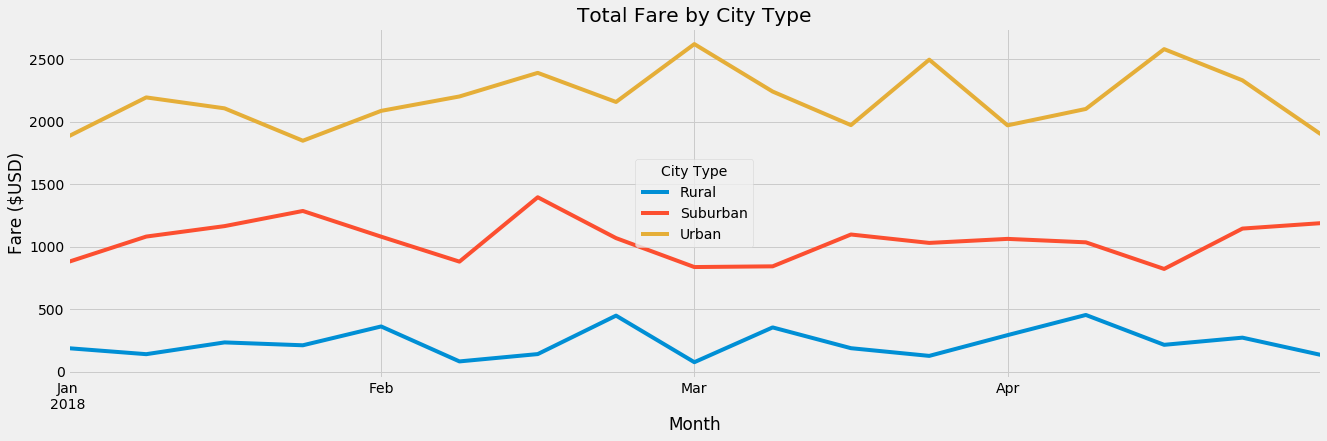

In [144]:
from matplotlib import style
style.use('fivethirtyeight')
ax = weekly_fares_df.plot(figsize = (20,6))
# Add a title
ax.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
plt.savefig("analysis/Challenge_fare_summary.png")
plt.show()